In [ ]:
%load_ext autoreload
%autoreload 2
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
import transects
from ganwrapper import Generator
from tqdm import tqdm

import util
from config import *
G = Generator(image_size=512)

In [5]:
DIR_PROJECTIONS = 'sample_projection/projected'
fnames = [f for f in os.listdir(DIR_PROJECTIONS)
          if '.npy' in f and not '02' in f]
latents = np.array([np.load(oj(DIR_PROJECTIONS, f)) for f in fnames])
vecs = {fnames[i][:-7]: latents[i].reshape(1, 18, 512) for i in range(len(fnames))}

# now let's manipulate the images

In [6]:
print(vecs.keys())

dict_keys(['varun', 'pietro', 'yinuo3', 'malvika', 'alain', 'guha', 'yinuo_baby', 'amma', 'yinuo2', 'vishal', 'zartosht', 'kieran', 'gautam', 'jamie', 'jesse', 'yinuo', 'alex', 'raaz', 'phong', 'roy', 'andy', 'stan', 'alan', 'chan_baby', 'mom', 'chandan', 'roli', 'dad', 'matt'])


In [7]:
def g(x):
    return G.generateImageFromStyleFull(x)

**interpolate past one image**

In [ ]:
print('norms',
      np.linalg.norm(vecs['chandan'].flatten()),
      np.linalg.norm(vecs['pietro'].flatten()),
      np.linalg.norm(vecs['chandan'].flatten() - vecs['pietro'].flatten()))
util.imshow(g(vecs['chandan']))
plt.show()
util.imshow(g(vecs['pietro']))
plt.show()
util.imshow(g(
    (vecs['pietro'] - 0.3 * vecs['chandan']) / 1.3
             ))
plt.show()

**add random noise**

(30, 1, 512, 512, 3)


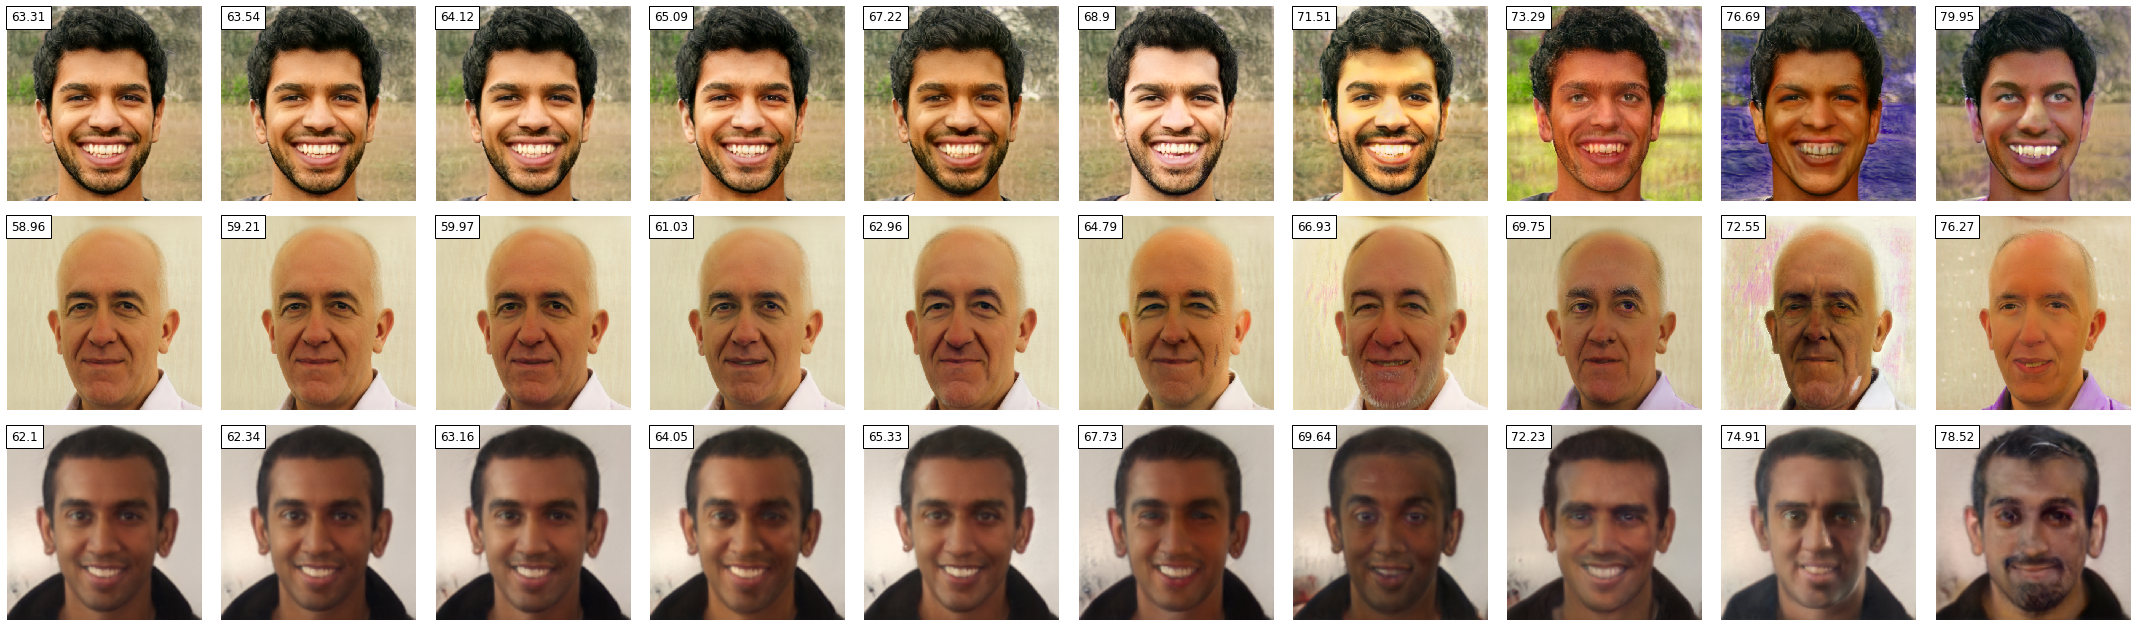

In [34]:
np.random.seed(42)
ims = []
annots = []
names = ['chandan', 'pietro', 'guha']
for name in names:
    for i in np.linspace(0, 0.5, 10):
        v = vecs[name]
        vnew = v + np.random.randn(*v.shape) * i
        ims.append(g(vnew))
        annots.append(np.linalg.norm(vnew.flatten()).round(2))
ims = np.array(ims)
print(ims.shape)
util.plot_grid(np.array(ims).reshape(len(names), int(ims.shape[0] / len(names)),
                                    *ims.shape[2:]), annot_list=annots)
plt.show()